# Manipulating DataFrames

<div class="alert alert-block alert-danger">
<b>3 Principles of Tidy Data</b> 
<ul>
    <li>Columns = Seperate Variables</li>
    <li>Rows = Individual Observations</li>
    <li>Table = Observational Unit</li>
</ul>
</div>

## Wide -> Long with melt()

``` python
pd.melt(df,
        id_vars=['col1'],         #columns to stay fixed 
        value_vars = ['col2', 'col3'] , #By default all remaining columns
        var_name = 'xyz',
        value_name='xyz')
```

In [115]:
#DATA
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/666/datasets/c16448e3f4219f900f540c455fdf87b0f3da70e0/airquality.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

M = np.char.array(df.Month.to_numpy().astype('str'))
D = np.char.array(df.Day.to_numpy().astype('str'))
Date = '1973'+'/'+M+'/'+D
df['Date'] = Date
df['Date'] =pd.to_datetime(df.Date,format='%Y/%m/%d')
df = df.drop(columns=['Month', 'Day'])
df.head(2)

,Ozone,Solar.R,Wind,Temp,Date
0,41.0,190.0,7.4,67,1973-05-01
1,36.0,118.0,8.0,72,1973-05-02


In [114]:
df2 = pd.melt(df,id_vars=['Date'])
df2.tail(5)

,Date,variable,value
607,1973-09-26,Temp,70.0
608,1973-09-27,Temp,77.0
609,1973-09-28,Temp,75.0
610,1973-09-29,Temp,76.0
611,1973-09-30,Temp,68.0


## Pivoting

- Opposite of Melting

### df.pivot()  - > Can't handle Repeated Values

``` python
df_pivot = df.pivot(index='col1',      #column to stay fixed 
                          columns='col2',  #Column to pivot (eg: Categorical Column)
                          values='col3')     #How to populate pivot column
```

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Output</b> = Has Hierarchical Index(MultiIndex) , thus use reset-index

</p>

``` python
df.reset_index() 
```

In [116]:
#DATA
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/666/datasets/c16448e3f4219f900f540c455fdf87b0f3da70e0/airquality.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

M = np.char.array(df.Month.to_numpy().astype('str'))
D = np.char.array(df.Day.to_numpy().astype('str'))
Date = '1973'+'/'+M+'/'+D
df['Date'] = Date
df['Date'] =pd.to_datetime(df.Date,format='%Y/%m/%d')
df = df.drop(columns=['Month', 'Day'])
df = pd.melt(df,id_vars=['Date'])
df.tail(5)

,Date,variable,value
607,1973-09-26,Temp,70.0
608,1973-09-27,Temp,77.0
609,1973-09-28,Temp,75.0
610,1973-09-29,Temp,76.0
611,1973-09-30,Temp,68.0


In [124]:
df_pivot = df.pivot(index='Date', columns='variable', values='value')
df_pivot.head(3)

variable,Ozone,Solar.R,Temp,Wind
Date,,,,
1973-05-01,41.0,190.0,67.0,7.4
1973-05-02,36.0,118.0,72.0,8.0
1973-05-03,12.0,149.0,74.0,12.6


In [129]:
df_pivot_reset_index = df_pivot.reset_index() 

In [131]:
df_pivot.index

DatetimeIndex(['1973-05-01', '1973-05-02', '1973-05-03', '1973-05-04',
               '1973-05-05', '1973-05-06', '1973-05-07', '1973-05-08',
               '1973-05-09', '1973-05-10',
               ...
               '1973-09-21', '1973-09-22', '1973-09-23', '1973-09-24',
               '1973-09-25', '1973-09-26', '1973-09-27', '1973-09-28',
               '1973-09-29', '1973-09-30'],
              dtype='datetime64[ns]', name='Date', length=153, freq=None)

In [130]:
df_pivot_reset_index.index

RangeIndex(start=0, stop=153, step=1)

### df.pivot_table()  - > Can  handle Repeated Values(Aggregating)

``` python
df_pivot = df.pivot_table(index='col1',      #column to stay fixed 
                          columns='col2', #Column to pivot (eg: Categorical Column)
                          values='col3',     #How to populate pivot column
                          aggfunc = np.mean)   #What to do with repeated values
```

In [136]:
frames = [df, df, df]
DF = pd.concat(frames)
DF.head(2)

,Date,variable,value
0,1973-05-01,Ozone,41.0
1,1973-05-02,Ozone,36.0


In [139]:
df_pivot = DF.pivot_table(index='Date',      
                          columns='variable', 
                          values='value',     
                          aggfunc = np.mean)
df_pivot.head(2)

variable,Ozone,Solar.R,Temp,Wind
Date,,,,
1973-05-01,41.0,190.0,67.0,7.4
1973-05-02,36.0,118.0,72.0,8.0


## Columns Containig Multiple bits of same Information

### Columns Containig Multiple bits of same Information

In [142]:
#DATA
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/666/datasets/cf05b5e01009dd5d61d7db5ac5fb790042e7fd09/tb.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
X.head(2)

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN


- m014 = MALE 0-14 Years

In [146]:
X_ = pd.melt(X, id_vars = ['country','year'])
X_.head(5)

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


- column.str -> Converts columns to Strings
- Use string Methods to get first element in string
- column.str[0]

In [149]:
X_['gender'] = X_.variable.str[0]
X_.head(2)

,country,year,variable,value,gender
0,AD,2000,m014,0.0,m
1,AE,2000,m014,2.0,m


In [151]:
X_['age_group'] = X_.variable.str[1:]
X_.head(2)

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014


### Columns Containig Multiple bits of same Information + DELIMITED columns

In [152]:
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/666/datasets/6da83b3d2017245217d35989960184234a6c4e7f/ebola.csv"
s=requests.get(url).content
XX=pd.read_csv(io.StringIO(s.decode('utf-8')))
XX.head(2)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN


In [153]:
XX_melt = pd.melt(XX, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
XX_melt.head(2)

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0


In [154]:
XX_melt['str_split'] = XX_melt.type_country.str.split('_')
XX_melt.head(2)

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"


In [155]:
XX_melt['type'] = XX_melt.str_split.str.get(0)
XX_melt.head(2)

,Date,Day,type_country,counts,str_split,type
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases


In [156]:
XX_melt['country'] = XX_melt.str_split.str.get(1)
XX_melt.head(2)

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea


## Combining data

### Concatenation

#### DataFrame Concatentaion

``` python
df_to_concat = pd.concat([df1, df2, df3] , ignore_index=True)  #default::: axis=0 #Row
#ignore_index=True = Takes care of index resetting to prevent repeated indices


or

df1.append(df2).append(df3, ignore_index=True)  # ignore_index=True index values are not used along the concatenation axis
```

#### Column-Wise Concatenation (stitching data together from the sides)

``` python
pd.concat([df1, df2], axis=1)
```

In [165]:
XXX = XX_melt.drop(XX_melt.columns[[4,5,6]], axis=1)
XXX.head(2)

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0


In [170]:
Y = XX_melt[['type','country']]
Y.head(2)

,type,country
0,Cases,Guinea
1,Cases,Guinea


In [171]:
pd.concat([XXX,Y], axis=1)

,Date,Day,type_country,counts,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


#### Concatenation MANY!! Dataframes

globbing - File name Pattern Matching

Wildcard = Symbol that matches any arbitrary # of characters
- '*' - mathces any string
- ? matches ONLY 1 character (0-9 or a-z)

eg: <br>
*.csv = matches any file ending in .csv <br>
file_?.csv  = matches --->>file_0.csv, file_3.csv,......etc.....

``` python
import glob
pattern = 'datasets/*.csv'
csv_file_names = glob.glob(pattern)
```

In [172]:
import glob

In [177]:
pattern = 'datasets/*.csv'
csv_files = glob.glob(pattern)
print(csv_files)

['datasets\\APPL.csv', 'datasets\\capital-onebike.csv', 'datasets\\digits.csv', 'datasets\\Election.csv', 'datasets\\Hospital Data.csv', 'datasets\\Meteor.csv', 'datasets\\temperature.csv', 'datasets\\titanic.csv', 'datasets\\winequality-red.csv']


<b> Storing DataFrames in a List </b>

In [ ]:
data_frames = []
for filename in csv_files:
    df = pd.read_csv(filename)
    data_frames.append(df)

In [ ]:
DF = pd.concat(data_frames)

#### Concatenating Dataframe with SAME indices (use MULTILEVEL indexing)

##### Concatenating Row Wise

``` python
pd.concat([df1,df2,df3], 
          keys=['key_outer_index_df1', 'key_outer_index_df2', 'key_outer_index_df3'])
```

In [14]:
bronze = pd.DataFrame({'Country':['USA' , 'USSR' , 'UK' , 'France' , 'Germany'] , 'Total':[23,56,84,56,78]})
silver = pd.DataFrame({'Country':['USA' , 'USSR' , 'UK' , 'France' , 'Italy'] , 'Total':[12,45,67,34,56]})
gold = pd.DataFrame({'Country':['USA','USSR' , 'UK' , 'Italy' , 'Germany'] , 'Total':[45,12,56,78,34]})
bronze = bronze.set_index('Country')
silver = silver.set_index('Country')
gold = gold.set_index('Country')

In [15]:
bronze

,Total
Country,
USA,23
USSR,56
UK,84
France,56
Germany,78


In [16]:
silver

,Total
Country,
USA,12
USSR,45
UK,67
France,34
Italy,56


In [17]:
gold

,Total
Country,
USA,45
USSR,12
UK,56
Italy,78
Germany,34


<b> NAIEVE CONCATENATION :</b>

In [20]:
pd.concat([bronze, silver,gold])

,Total
Country,
USA,23
USSR,56
UK,84
France,56
Germany,78
USA,12
USSR,45
UK,67
France,34


<b> Multi-Level Indexing :</b>

In [24]:
DF = pd.concat([bronze, silver,gold], keys=['bronze', 'silver', 'gold'])
DF

Total
       Country       
bronze USA         23
       USSR        56
       UK          84
       France      56
       Germany     78
silver USA         12
       USSR        45
       UK          67
       France      34
       Italy       56
gold   USA         45
       USSR        12
       UK          56
       Italy       78
       Germany     34

In [36]:
DF.sort_index(level=0)

Total
       Country       
bronze France      56
       Germany     78
       UK          84
       USA         23
       USSR        56
gold   Germany     34
       Italy       78
       UK          56
       USA         45
       USSR        12
silver France      34
       Italy       56
       UK          67
       USA         12
       USSR        45

##### Concatenating Column Wise

``` python
pd.concat([bronze, silver, gold], 
          keys=['bronze','silver','gold'] , axis='columns')
```

In [45]:
bronze

,Total
Country,
USA,23
USSR,56
UK,84
France,56
Germany,78


In [46]:
silver

,Total
Country,
USA,12
USSR,45
UK,67
France,34
Italy,56


In [47]:
gold

,Total
Country,
USA,45
USSR,12
UK,56
Italy,78
Germany,34


In [52]:
DF = pd.concat([bronze, silver, gold], 
          keys=['bronze','silver','gold'] , axis='columns')
DF

,bronze,silver,gold
,Total,Total,Total
USA,23.0,12.0,45.0
USSR,56.0,45.0,12.0
UK,84.0,67.0,56.0
France,56.0,34.0,NaN
Germany,78.0,NaN,34.0
Italy,NaN,56.0,78.0


In [54]:
idx = pd.IndexSlice

In [53]:
DF['bronze']

,Total
USA,23.0
USSR,56.0
UK,84.0
France,56.0
Germany,78.0
Italy,NaN


In [59]:
DF.loc['France':  , idx['silver':]  ]

,silver,gold
,Total,Total
France,34.0,NaN
Germany,NaN,34.0
Italy,56.0,78.0


##### Slicing

In [32]:
DF.loc['bronze']

,Total
Country,
USA,23
USSR,56
UK,84
France,56
Germany,78


<b> Slicing Outer-Level </b>

In [37]:
DF.loc[('bronze','USA')]

Total    23
Name: (bronze, USA), dtype: int64

<b> Slicing Inner-Level </b>

``` python
idx = pd.IndexSlice
```

Create an alias for pd.IndexSlice called idx. A slicer pd.IndexSlice is required when slicing on the inner level of a MultiIndex

In [41]:
idx = pd.IndexSlice

In [44]:
DF.loc[idx[:,'UK'], :]

,,Total
,Country,
bronze,UK,84
silver,UK,67
gold,UK,56


#### Concatenating DataFrames from a dict

In [ ]:
DF_dict = {2013: df_2013 , 2014: df_2014}
DF = pd.concat(DF_dict, axis='columns')

### Inner/Outer Join

#### Inner Join

``` python
pd.concat([df1,df2,df3] , 
          keys=['df1_col_key', 'df2_col_key', 'df3_col_key'], 
          axis=1, 
          join='inner')
```

In [61]:
bronze

,Total
Country,
USA,23
USSR,56
UK,84
France,56
Germany,78


In [62]:
silver

,Total
Country,
USA,12
USSR,45
UK,67
France,34
Italy,56


In [63]:
gold

,Total
Country,
USA,45
USSR,12
UK,56
Italy,78
Germany,34


In [64]:
medal_list = [bronze, silver, gold]
# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

medals

,bronze,silver,gold
,Total,Total,Total
Country,,,
USA,23,12,45
USSR,56,45,12
UK,84,67,56


#### Outer Join 

In [79]:
us = pd.read_csv('datasets/GDP/gdp_usa.csv' , index_col = 'DATE',parse_dates=True)
china = pd.read_csv('datasets/GDP/gdp_china.csv',index_col = 'Year',parse_dates=True)

In [98]:
us.head(3)

,VALUE
DATE,
1947-01-01,243.1
1947-04-01,246.3
1947-07-01,250.1


In [88]:
china.head(2)

,GDP
Year,
1960-01-01,59.184116
1961-01-01,49.557050


In [100]:
china_annual = china.resample('A').last().pct_change(10).dropna()
#percentage change with an offset of ten years 
#.last = End of Year

In [101]:
#percentage change with an offset of ten years
us_annual = us.resample('A').last().pct_change(10).dropna()

In [102]:
china_annual.head(2)

,GDP
Year,
1970-12-31,0.546128
1971-12-31,0.988860


In [103]:
us_annual.head(2)

,VALUE
DATE,
1957-12-31,0.827507
1958-12-31,0.782686


In [104]:
# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], axis=1, join='inner')

In [106]:
gdp.head(3)

,GDP,VALUE
Year,,
1970-12-31,0.546128,1.017187
1971-12-31,0.988860,1.052270
1972-12-31,1.402472,1.172566


In [107]:
gdp.resample('10A').last()

,GDP,VALUE
Year,,
1970-12-31,0.546128,1.017187
1980-12-31,1.072537,1.742556
1990-12-31,0.892820,1.012126
2000-12-31,2.357522,0.738632
2010-12-31,4.011081,0.454332
2020-12-31,3.789936,0.361780


### Merging Data

- Concatenating can be done only when row-ordering IS THE SAME!
- Thus Merging (Combining based on common columns)

``` python
pd.merge(left=D1, right=D2, left_on='df1_c1', right_on='df2_c1')

pd.merge(D1, D2, on = ['c1' ,'c2'] , suffixes = ['_suffix1' , '_suffix2']) 
#Merging on Multiple COlumns
```

#### One-One Merge

In [119]:
D1={'name':['DR-1','MSK-4','DR-3'], 'lat':np.array([-49, -47, -48]), 'long':np.array([-128, -126, -123])}
D2={'ident':np.array([619,734, 837]), 'site':['DR-1','DR-3','MSK-4'], 'dated':['1927-02-08','1939-01-07','1932-01-14']}
D1 = pd.DataFrame.from_dict(D1)
D2 = pd.DataFrame.from_dict(D2)

In [120]:
D1

,name,lat,long
0,DR-1,-49,-128
1,MSK-4,-47,-126
2,DR-3,-48,-123


In [121]:
D2

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [122]:
pd.merge(left=D1, right=D2, left_on='name', right_on='site')

,name,lat,long,ident,site,dated
0,DR-1,-49,-128,619,DR-1,1927-02-08
1,MSK-4,-47,-126,837,MSK-4,1932-01-14
2,DR-3,-48,-123,734,DR-3,1939-01-07


#### Many to One Merge

In [205]:
D1

,name,lat,long
0,DR-1,-49,-128
1,MSK-4,-47,-126
2,DR-3,-48,-123


In [213]:
D3 = {'ident':np.array([619,622,734,735,751,752,837,844]), 'site':['DR-1','DR-1','DR-3','DR-3','DR-3','DR-3','MSK-4','DR-1'], 'dated':['1927-02-08','1939-01-07','1932-01-14','1932-01-14','1932-01-14',np.nan,'1932-01-14','1932-01-14']}
D3 = pd.DataFrame.from_dict(D3)
D3

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1939-01-07
2,734,DR-3,1932-01-14
3,735,DR-3,1932-01-14
4,751,DR-3,1932-01-14
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-01-14


- Extra's are <b> DUPLICATED </b>

In [206]:
pd.merge(left=D1, right=D3, left_on='name', right_on='site')

,name,lat,long,ident,site,dated
0,DR-1,-49,-128,619,DR-1,1927-02-08
1,DR-1,-49,-128,622,DR-1,1939-01-07
2,DR-1,-49,-128,844,DR-1,1932-01-14
3,MSK-4,-47,-126,837,MSK-4,1932-01-14
4,DR-3,-48,-123,734,DR-3,1932-01-14
5,DR-3,-48,-123,735,DR-3,1932-01-14
6,DR-3,-48,-123,751,DR-3,1932-01-14
7,DR-3,-48,-123,752,DR-3,NaN


#### Many to Many

-  both DataFrames do not have unique keys for a merge.

In [210]:
D1

,name,lat,long
0,DR-1,-49,-128
1,MSK-4,-47,-126
2,DR-3,-48,-123


In [214]:
D3

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1939-01-07
2,734,DR-3,1932-01-14
3,735,DR-3,1932-01-14
4,751,DR-3,1932-01-14
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-01-14


In [216]:
YY = pd.merge(left=D1, right=D3, left_on='name', right_on='site')
YY

,name,lat,long,ident,site,dated
0,DR-1,-49,-128,619,DR-1,1927-02-08
1,DR-1,-49,-128,622,DR-1,1939-01-07
2,DR-1,-49,-128,844,DR-1,1932-01-14
3,MSK-4,-47,-126,837,MSK-4,1932-01-14
4,DR-3,-48,-123,734,DR-3,1932-01-14
5,DR-3,-48,-123,735,DR-3,1932-01-14
6,DR-3,-48,-123,751,DR-3,1932-01-14
7,DR-3,-48,-123,752,DR-3,NaN


In [209]:
D4 = {'taken':np.array([619,619,622,622,734,734,734,735,735,735,751,751,751,751]), 'person':['dyer','dyer','dyer','dyer','pb','lake','pb','pb',np.nan, np.nan, 'pb','pb','lake','roe'], 'quant':['rad','rad','rad','rad','rad','rad','rad','rad','rad','temp','temp','temp','temp','temp'],'reading':[9,3,5,6,7,2,3,4,1,2,3,4,5,6]}
D4 = pd.DataFrame.from_dict(D4)
D4

,taken,person,quant,reading
0,619,dyer,rad,9
1,619,dyer,rad,3
2,622,dyer,rad,5
3,622,dyer,rad,6
4,734,pb,rad,7
5,734,lake,rad,2
6,734,pb,rad,3
7,735,pb,rad,4
8,735,NaN,rad,1
9,735,NaN,temp,2


In [217]:
pd.merge(left=YY, right=D4, left_on='ident', right_on='taken')

,name,lat,long,ident,site,dated,taken,person,quant,reading
0,DR-1,-49,-128,619,DR-1,1927-02-08,619,dyer,rad,9
1,DR-1,-49,-128,619,DR-1,1927-02-08,619,dyer,rad,3
2,DR-1,-49,-128,622,DR-1,1939-01-07,622,dyer,rad,5
3,DR-1,-49,-128,622,DR-1,1939-01-07,622,dyer,rad,6
4,DR-3,-48,-123,734,DR-3,1932-01-14,734,pb,rad,7
5,DR-3,-48,-123,734,DR-3,1932-01-14,734,lake,rad,2
6,DR-3,-48,-123,734,DR-3,1932-01-14,734,pb,rad,3
7,DR-3,-48,-123,735,DR-3,1932-01-14,735,pb,rad,4
8,DR-3,-48,-123,735,DR-3,1932-01-14,735,NaN,rad,1
9,DR-3,-48,-123,735,DR-3,1932-01-14,735,NaN,temp,2


#### merge_ordered()

- Same as merge + .sorted_values('merging_columns')

``` python
pd.merge_ordered(df1, df2 , on =['c1', 'c2'] ,
                 suffixes=['_s1', '_s2'] ,
                fill_method='ffill')   #Forward filling (most recent Non-Null value) 
#Default = Outer Join
```

In [131]:
austin = pd.DataFrame({'date':['2016-01-01','2016-02-08','2016-01-17'] , 'ratings':['Cloudy','Cloudy' , 'Sunny']})
houston = pd.DataFrame({'date':['2016-01-04','2016-01-01','2016-03-01'] , 'ratings':['Rainy','Cloudy' , 'Sunny']})

In [132]:
austin

,date,ratings
0,2016-01-01,Cloudy
1,2016-02-08,Cloudy
2,2016-01-17,Sunny


In [133]:
houston

,date,ratings
0,2016-01-04,Rainy
1,2016-01-01,Cloudy
2,2016-03-01,Sunny


In [144]:
pd.merge_ordered(austin, houston , how='outer', on='date', suffixes=['_austin' , '_houston'])

,date,ratings_austin,ratings_houston
0,2016-01-01,Cloudy,Cloudy
1,2016-01-04,NaN,Rainy
2,2016-01-17,Sunny,NaN
3,2016-02-08,Cloudy,NaN
4,2016-03-01,NaN,Sunny


In [139]:
pd.merge_ordered(austin, houston)

,date,ratings
0,2016-01-01,Cloudy
1,2016-01-04,Rainy
2,2016-01-17,Sunny
3,2016-02-08,Cloudy
4,2016-03-01,Sunny


In [142]:
pd.merge_ordered(austin, houston, on='date', fill_method='ffill', suffixes=['_aus', '_hus'])

,date,ratings_aus,ratings_hus
0,2016-01-01,Cloudy,Cloudy
1,2016-01-04,Cloudy,Rainy
2,2016-01-17,Sunny,Rainy
3,2016-02-08,Cloudy,Rainy
4,2016-03-01,Cloudy,Sunny


#### pd.merge_asof()

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be used to align disparate datetime frequencies without having to first resample.

In [204]:
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/516/datasets/2f3d8b2156d5669fb7e12137f1c2e979c3c9ce0b/automobiles.csv"
s=requests.get(url).content
auto=pd.read_csv(io.StringIO(s.decode('utf-8')))
auto['yr'] = pd.to_datetime(auto['yr'])
auto.head(2)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970-01-01,US,buick skylark 320


In [203]:
url="https://assets.datacamp.com/production/repositories/516/datasets/707566cf46c4dd6290b9029f5e07a92baf3fe3f7/oil_price.csv"
s=requests.get(url).content
oil=pd.read_csv(io.StringIO(s.decode('utf-8')))
oil['Date'] = pd.to_datetime(oil['Date'])
oil.head(2)

,Date,Price
0,1970-01-01,3.35
1,1970-02-01,3.35


In [206]:
print(auto.shape)
print(oil.shape)

(392, 9)
(156, 2)


In [208]:
pd.merge(auto, oil,left_on='yr', right_on='Date', how='outer')

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970-01-01,US,chevrolet chevelle malibu,1970-01-01,3.35
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970-01-01,US,buick skylark 320,1970-01-01,3.35
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970-01-01,US,plymouth satellite,1970-01-01,3.35
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970-01-01,US,amc rebel sst,1970-01-01,3.35
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970-01-01,US,ford torino,1970-01-01,3.35
...,...,...,...,...,...,...,...,...,...,...,...
530,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-08-01,33.95
531,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-09-01,35.63
532,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-10-01,35.68
533,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-11-01,34.15


In [209]:
pd.merge_ordered(auto, oil,left_on='yr', right_on='Date')

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970-01-01,US,chevrolet chevelle malibu,1970-01-01,3.35
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970-01-01,US,buick skylark 320,1970-01-01,3.35
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970-01-01,US,plymouth satellite,1970-01-01,3.35
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970-01-01,US,amc rebel sst,1970-01-01,3.35
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970-01-01,US,ford torino,1970-01-01,3.35
...,...,...,...,...,...,...,...,...,...,...,...
530,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-08-01,33.95
531,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-09-01,35.63
532,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-10-01,35.68
533,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1982-11-01,34.15


In [212]:
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')
merged

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,Date,Price
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu,1970-01-01,3.35
1,15.0,8,350.0,165,3693,11.5,1970-01-01,US,buick skylark 320,1970-01-01,3.35
2,18.0,8,318.0,150,3436,11.0,1970-01-01,US,plymouth satellite,1970-01-01,3.35
3,16.0,8,304.0,150,3433,12.0,1970-01-01,US,amc rebel sst,1970-01-01,3.35
4,17.0,8,302.0,140,3449,10.5,1970-01-01,US,ford torino,1970-01-01,3.35
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982-01-01,US,ford mustang gl,1982-01-01,33.85
388,44.0,4,97.0,52,2130,24.6,1982-01-01,Europe,vw pickup,1982-01-01,33.85
389,32.0,4,135.0,84,2295,11.6,1982-01-01,US,dodge rampage,1982-01-01,33.85
390,28.0,4,120.0,79,2625,18.6,1982-01-01,US,ford ranger,1982-01-01,33.85


In [216]:
# Resample merged: yearly
yearly = merged.resample('A',on='Date')[['mpg','Price']].mean()

In [220]:
yearly.head(4)

,mpg,Price
Date,,
1970-12-31,17.689655,3.35
1971-12-31,21.111111,3.56
1972-12-31,18.714286,3.56
1973-12-31,17.100000,3.56


In [234]:
yearly['mpg']

Date
1970-12-31    17.689655
1971-12-31    21.111111
1972-12-31    18.714286
1973-12-31    17.100000
1974-12-31    22.769231
1975-12-31    20.266667
1976-12-31    21.573529
1977-12-31    23.375000
1978-12-31    24.061111
1979-12-31    25.093103
1980-12-31    33.803704
1981-12-31    30.185714
1982-12-31    32.000000
Freq: A-DEC, Name: mpg, dtype: float64

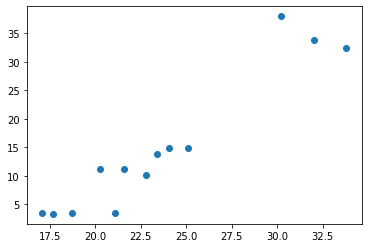

In [235]:
plt.scatter(yearly['mpg'],yearly['Price'])

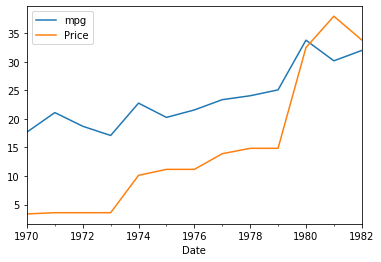

In [223]:
yearly.plot()

In [221]:
print(yearly.corr())

            mpg     Price
mpg    1.000000  0.948677
Price  0.948677  1.000000


## Case Study - Summer Olympics

<b> Does a Host Country Win more medals </b> ?

In [387]:
file_path = 'datasets/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
editions = pd.read_csv(file_path, sep='\t')
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

In [388]:
editions.head(3)

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States


In [389]:
file_path = 'datasets/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
ioc_codes = pd.read_csv(file_path)
ioc_codes = ioc_codes[['Country', 'NOC']]
ioc_codes.head(2)

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB


In [390]:
file_path = 'datasets/Summer Olympic medals/medals.csv'
medals = pd.read_csv(file_path , encoding = "ISO-8859-1")
medals = medals[['Athlete', 'Country_Code', 'Medal', 'Year']]
medals.head(3)

,Athlete,Country_Code,Medal,Year
0,"KÖHLER, Christa",GDR,Silver,1976.0
1,"KOSENKOV, Aleksandr",URS,Bronze,1976.0
2,"BOGGS, Philip George",USA,Gold,1976.0


In [391]:
PIVOT = pd.pivot_table(medals, index='Year' , columns='Country_Code', values='Medal', aggfunc='count')
PIVOT

Country_Code,AFG,AHO,ALG,ARG,ARM,AUS,AUT,AZE,BAH,BAR,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1976.0,NaN,NaN,NaN,NaN,NaN,24.0,1.0,NaN,NaN,NaN,...,NaN,285.0,NaN,155.0,NaN,1.0,NaN,19.0,NaN,NaN
1980.0,NaN,NaN,NaN,NaN,NaN,12.0,5.0,NaN,NaN,NaN,...,NaN,442.0,NaN,NaN,NaN,1.0,NaN,57.0,NaN,16.0
1984.0,NaN,NaN,2.0,NaN,NaN,50.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,333.0,NaN,3.0,NaN,87.0,1.0,NaN
1988.0,NaN,1.0,NaN,13.0,NaN,34.0,1.0,NaN,NaN,NaN,...,NaN,294.0,NaN,193.0,NaN,NaN,NaN,63.0,NaN,NaN
1992.0,NaN,NaN,2.0,2.0,NaN,57.0,6.0,NaN,1.0,NaN,...,NaN,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,3.0,20.0,2.0,132.0,3.0,1.0,5.0,NaN,...,34.0,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN
2000.0,NaN,NaN,5.0,20.0,1.0,183.0,4.0,3.0,6.0,1.0,...,35.0,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN
2004.0,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,NaN,...,48.0,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0
2008.0,1.0,NaN,2.0,51.0,6.0,149.0,3.0,7.0,5.0,NaN,...,31.0,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0


<b> Normalizing </b> 
- Computing fraction of medals per Olympic edition

In [512]:
available_years = PIVOT.index.to_numpy(dtype=np.int)
total_medals = editions[editions['Edition'].isin(available_years)]
total = total_medals['Grand Total']
total = total_medals.set_index('Edition')
total

,Grand Total,City,Country
Edition,,,
1976,1305,Montreal,Canada
1980,1387,Moscow,U.S.S.R. (now Russia)
1984,1459,Los Angeles,United States
1988,1546,Seoul,South Korea
1992,1705,Barcelona,Spain
1996,1859,Atlanta,United States
2000,2015,Sydney,Australia
2004,1998,Athens,Greece
2008,2042,Beijing,China


In [513]:
normalized = PIVOT.divide(total['Grand Total'], axis='rows')
normalized 

Country_Code,AFG,AHO,ALG,ARG,ARM,AUS,AUT,AZE,BAH,BAR,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1976.0,NaN,NaN,NaN,NaN,NaN,0.018391,0.000766,NaN,NaN,NaN,...,NaN,0.218391,NaN,0.118774,NaN,0.000766,NaN,0.014559,NaN,NaN
1980.0,NaN,NaN,NaN,NaN,NaN,0.008652,0.003605,NaN,NaN,NaN,...,NaN,0.318673,NaN,NaN,NaN,0.000721,NaN,0.041096,NaN,0.011536
1984.0,NaN,NaN,0.001371,NaN,NaN,0.034270,0.002056,NaN,NaN,NaN,...,NaN,NaN,NaN,0.228239,NaN,0.002056,NaN,0.059630,0.000685,NaN
1988.0,NaN,0.000647,NaN,0.008409,NaN,0.021992,0.000647,NaN,NaN,NaN,...,NaN,0.190168,NaN,0.124838,NaN,NaN,NaN,0.040750,NaN,NaN
1992.0,NaN,NaN,0.001173,0.001173,NaN,0.033431,0.003519,NaN,0.000587,NaN,...,NaN,NaN,NaN,0.131378,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,0.001614,0.010758,0.001076,0.071006,0.001614,0.000538,0.002690,NaN,...,0.018289,NaN,NaN,0.139860,0.001076,NaN,NaN,0.013986,0.000538,NaN
2000.0,NaN,NaN,0.002481,0.009926,0.000496,0.090819,0.001985,0.001489,0.002978,0.000496,...,0.017370,NaN,0.000496,0.123077,0.001985,NaN,0.000496,0.012903,NaN,NaN
2004.0,NaN,NaN,NaN,0.023524,NaN,0.078579,0.004004,0.002503,0.001001,NaN,...,0.024024,NaN,NaN,0.132132,0.002503,0.001001,NaN,NaN,NaN,0.001502
2008.0,0.00049,NaN,0.000979,0.024976,0.002938,0.072968,0.001469,0.003428,0.002449,NaN,...,0.015181,NaN,NaN,0.154261,0.002938,0.000490,0.000490,NaN,NaN,0.001959


<b> To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time </b>

In [514]:
mean_fractions = normalized.expanding().mean()
mean_fractions

Country_Code,AFG,AHO,ALG,ARG,ARM,AUS,AUT,AZE,BAH,BAR,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1976.0,NaN,NaN,NaN,NaN,NaN,0.018391,0.000766,NaN,NaN,NaN,...,NaN,0.218391,NaN,0.118774,NaN,0.000766,NaN,0.014559,NaN,NaN
1980.0,NaN,NaN,NaN,NaN,NaN,0.013521,0.002186,NaN,NaN,NaN,...,NaN,0.268532,NaN,0.118774,NaN,0.000744,NaN,0.027828,NaN,0.011536
1984.0,NaN,NaN,0.001371,NaN,NaN,0.020438,0.002142,NaN,NaN,NaN,...,NaN,0.268532,NaN,0.173506,NaN,0.001181,NaN,0.038428,0.000685,0.011536
1988.0,NaN,0.000647,0.001371,0.008409,NaN,0.020826,0.001769,NaN,NaN,NaN,...,NaN,0.242411,NaN,0.157284,NaN,0.001181,NaN,0.039009,0.000685,0.011536
1992.0,NaN,0.000647,0.001272,0.004791,NaN,0.023347,0.002119,NaN,0.000587,NaN,...,NaN,0.242411,NaN,0.150807,NaN,0.001181,NaN,0.039009,0.000685,0.011536
1996.0,NaN,0.000647,0.001386,0.006780,0.001076,0.031290,0.002035,0.000538,0.001638,NaN,...,0.018289,0.242411,NaN,0.148618,0.001076,0.001181,NaN,0.034004,0.000612,0.011536
2000.0,NaN,0.000647,0.001660,0.007566,0.000786,0.039794,0.002027,0.001013,0.002085,0.000496,...,0.017830,0.242411,0.000496,0.144361,0.001530,0.001181,0.000496,0.030487,0.000612,0.011536
2004.0,NaN,0.000647,0.001660,0.010758,0.000786,0.044642,0.002275,0.001510,0.001814,0.000496,...,0.019894,0.242411,0.000496,0.142614,0.001854,0.001136,0.000496,0.030487,0.000612,0.006519
2008.0,0.00049,0.000647,0.001524,0.013127,0.001503,0.047790,0.002185,0.001989,0.001941,0.000496,...,0.018716,0.242411,0.000496,0.144070,0.002125,0.001007,0.000493,0.030487,0.000612,0.004999


In [515]:
fractions_change = mean_fractions.pct_change()*100
fractions_change

Country_Code,AFG,AHO,ALG,ARG,ARM,AUS,AUT,AZE,BAH,BAR,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980.0,NaN,NaN,NaN,NaN,NaN,-26.478010,185.219899,NaN,NaN,NaN,...,NaN,22.959435,NaN,0.000000,NaN,-2.956020,NaN,91.131939,NaN,NaN
1984.0,NaN,NaN,NaN,NaN,NaN,51.150863,-1.973381,NaN,NaN,NaN,...,NaN,0.000000,NaN,46.081054,NaN,58.836037,NaN,38.094315,NaN,0.000000
1988.0,NaN,NaN,0.000000,NaN,NaN,1.901768,-17.452256,NaN,NaN,NaN,...,NaN,-9.727443,NaN,-9.349893,NaN,0.000000,NaN,1.510561,0.000000,0.000000
1992.0,NaN,0.0,-7.214076,-43.025039,NaN,12.104812,19.795899,NaN,NaN,NaN,...,NaN,0.000000,NaN,-4.117608,NaN,0.000000,NaN,0.000000,0.000000,0.000000
1996.0,NaN,0.0,8.959211,41.520054,NaN,34.021747,-3.971742,NaN,179.289941,NaN,...,NaN,0.000000,NaN,-1.451803,NaN,0.000000,NaN,-12.829316,-10.758472,0.000000
2000.0,NaN,0.0,19.762488,11.598145,-26.935484,27.177994,-0.346851,88.387097,27.259887,NaN,...,-2.514231,0.000000,NaN,-2.864272,42.258065,0.000000,NaN,-10.342356,0.000000,0.000000
2004.0,NaN,0.0,0.000000,42.178396,0.000000,12.182682,12.186183,48.982144,-12.995279,0.0,...,11.580875,0.000000,0.0,-1.210149,21.170339,-3.813101,0.000000,0.000000,0.000000,-43.491929
2008.0,NaN,0.0,-8.197807,22.026718,91.266408,7.049914,-3.934274,31.764436,7.000947,0.0,...,-5.922764,0.000000,0.0,1.020805,14.610625,-11.379128,-0.661117,0.000000,0.000000,-23.316533


In [516]:
fractions_change = fractions_change.reset_index()
fractions_change = fractions_change.reset_index()
fractions_change

Country_Code,index,Year,AFG,AHO,ALG,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
0,0,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1980.0,NaN,NaN,NaN,NaN,NaN,-26.478010,185.219899,NaN,...,NaN,22.959435,NaN,0.000000,NaN,-2.956020,NaN,91.131939,NaN,NaN
2,2,1984.0,NaN,NaN,NaN,NaN,NaN,51.150863,-1.973381,NaN,...,NaN,0.000000,NaN,46.081054,NaN,58.836037,NaN,38.094315,NaN,0.000000
3,3,1988.0,NaN,NaN,0.000000,NaN,NaN,1.901768,-17.452256,NaN,...,NaN,-9.727443,NaN,-9.349893,NaN,0.000000,NaN,1.510561,0.000000,0.000000
4,4,1992.0,NaN,0.0,-7.214076,-43.025039,NaN,12.104812,19.795899,NaN,...,NaN,0.000000,NaN,-4.117608,NaN,0.000000,NaN,0.000000,0.000000,0.000000
5,5,1996.0,NaN,0.0,8.959211,41.520054,NaN,34.021747,-3.971742,NaN,...,NaN,0.000000,NaN,-1.451803,NaN,0.000000,NaN,-12.829316,-10.758472,0.000000
6,6,2000.0,NaN,0.0,19.762488,11.598145,-26.935484,27.177994,-0.346851,88.387097,...,-2.514231,0.000000,NaN,-2.864272,42.258065,0.000000,NaN,-10.342356,0.000000,0.000000
7,7,2004.0,NaN,0.0,0.000000,42.178396,0.000000,12.182682,12.186183,48.982144,...,11.580875,0.000000,0.0,-1.210149,21.170339,-3.813101,0.000000,0.000000,0.000000,-43.491929
8,8,2008.0,NaN,0.0,-8.197807,22.026718,91.266408,7.049914,-3.934274,31.764436,...,-5.922764,0.000000,0.0,1.020805,14.610625,-11.379128,-0.661117,0.000000,0.000000,-23.316533


In [517]:
fractions_change = pd.melt(fractions_change , 
                           id_vars='Year',
                           value_vars = fractions_change.columns[2:] , 
                           value_name='Change')
fractions_change = fractions_change.dropna()
fractions_change['Year'] = fractions_change['Year'].astype(int)
fractions_change

,Year,Country_Code,Change
13,1992,AHO,0.000000
14,1996,AHO,0.000000
15,2000,AHO,0.000000
16,2004,AHO,0.000000
17,2008,AHO,0.000000
...,...,...,...
1147,1992,ZIM,0.000000
1148,1996,ZIM,0.000000
1149,2000,ZIM,0.000000
1150,2004,ZIM,-43.491929


<b> Building hosts DataFrame </b>

In [518]:
hosts = pd.merge(editions, ioc_codes , how='inner', on='Country')
hosts = hosts[['Edition', 'NOC', 'Country', 'City']]
hosts

,Edition,NOC,Country,City
0,1896,GRE,Greece,Athens
1,2004,GRE,Greece,Athens
2,1900,FRA,France,Paris
3,1924,FRA,France,Paris
4,1904,USA,United States,St. Louis
5,1932,USA,United States,Los Angeles
6,1984,USA,United States,Los Angeles
7,1996,USA,United States,Atlanta
8,1908,GBR,United Kingdom,London
9,1948,GBR,United Kingdom,London


In [519]:
merged = pd.merge(hosts , fractions_change , left_on = ['Edition','NOC'], right_on = ['Year','Country_Code'] , how='inner')
merged

,Edition,NOC,Country,City,Year,Country_Code,Change
0,2004,GRE,Greece,Athens,2004,GRE,52.103306
1,1984,USA,United States,Los Angeles,1984,USA,46.081054
2,1996,USA,United States,Atlanta,1996,USA,-1.451803
3,2000,AUS,Australia,Sydney,2000,AUS,27.177994
4,1992,ESP,Spain,Barcelona,1992,ESP,61.156607
5,2008,CHN,China,Beijing,2008,CHN,13.251332


In [520]:
influence = merged.set_index('Edition').sort_index()
influence

,NOC,Country,City,Year,Country_Code,Change
Edition,,,,,,
1984,USA,United States,Los Angeles,1984,USA,46.081054
1992,ESP,Spain,Barcelona,1992,ESP,61.156607
1996,USA,United States,Atlanta,1996,USA,-1.451803
2000,AUS,Australia,Sydney,2000,AUS,27.177994
2004,GRE,Greece,Athens,2004,GRE,52.103306
2008,CHN,China,Beijing,2008,CHN,13.251332


[Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'Barcelona'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'Athens'),
 Text(0, 0, 'Beijing')]

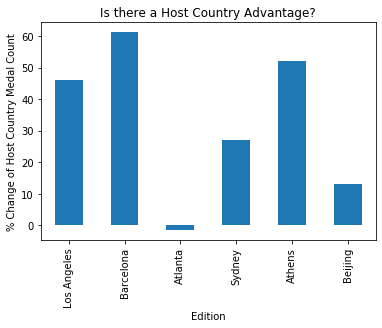

In [521]:
import matplotlib.pyplot as plt
change = influence['Change']
ax = change.plot(kind='bar')
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(influence['City'])

# Cleaning

## Data Types

``` python
df.info()
df.dtypes()

## -> CATEGORICAL
df.col1.astype('category')      #Convert into Categorical Type

## -> NUMERIC
pd.to_numeric(df['c1'] , errors='coerce')   #'corce' makes non-numeric data into NaN
```

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>NOTE:</b>  Categorical Data Saves Data

</p>

## Reindexing DataFrames + Sorting

### Format

- indices = row labels

``` python
##SETTING INDEX##
pd.read_csv('....' , index_col = '...')
df.set_index('month')


df.index   #Accessing index

df.reindex([LIST]) #ReIndexing Data
df1.reindex(df2.index)  #use indices of another dataframe
#Note: New row ith NaN's is crated for extra indices

##FORWARD-FILLING##
#replace the null values with the last preceding non-null value.
df.reindex(LIST).ffill()

df.sort_index(ascending=False/True)  #Sorting Index

##Sorting Using Column Values
df.sort_values('col1')
```

### Resettind Index (eg: After Concatenating)

``` python
df.reset_index(drop=True)  #Drop = True ... discards old index with repeated values(rather that keeping it as a column in a dataframe) 
```

### Setting Index

In [366]:
df = {'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] , 'Max Temp':[34,56,23,56,34,78,12,41,23,45,76,23]}
df = pd.DataFrame.from_dict(df)
df = df.set_index('Month')
df.head(3)

,Max Temp
Month,
Jan,34
Feb,56
Mar,23


### Sorting Index

In [371]:
df.sort_index(ascending=True).head(3)

,Max Temp
Month,
Apr,56
Aug,41
Dec,23


In [372]:
df.sort_index(ascending=False).head(3)

,Max Temp
Month,
Sep,23
Oct,45
Nov,76


In [373]:
df.sort_values('Max Temp')

,Max Temp
Month,
Jul,12
Mar,23
Sep,23
Dec,23
Jan,34
May,34
Aug,41
Oct,45
Feb,56


### Reindexing Index

``` python
df.reindex(LIST/df_index_series , method='ffill'/'bfill')
#ffill = Forward Fill (Fill's NaN's usgin first-appearing-closest non NanN row)
#ffill = Forward Fill (Fill's NaN's usgin last-appearing-closest non NanN row)

```

In [374]:
years  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 'DEC']

In [377]:
df.reindex(years).ffill()

,Max Temp
Month,
Jan,34.0
Feb,56.0
Mar,23.0
Apr,56.0
May,34.0
Jun,78.0
Jul,12.0
Aug,41.0
Sep,23.0


### Finding Common Matches b/w dataframes using indices

In [385]:
names1881 = pd.read_csv('datasets/Baby Names/names1881.csv',header=None, names=['name','gender','count'], index_col=(0,1))
names1981 = pd.read_csv('datasets/Baby Names/names1981.csv',header=None, names=['name','gender','count'], index_col=(0,1))

In [389]:
names1881

,,count
name,gender,
Mary,F,6919
Anna,F,2698
Emma,F,2034
Elizabeth,F,1852
Margaret,F,1658
...,...,...
Wiliam,M,5
Wilton,M,5
Wing,M,5


In [390]:
names1981

,,count
name,gender,
Jennifer,F,57032
Jessica,F,42519
Amanda,F,34370
Sarah,F,28162
Melissa,F,28003
...,...,...
Zeferino,M,5
Zerrick,M,5
Zimbabwe,M,5


In [393]:
common_names = names1981.reindex(names1881.index)
# Drop rows with null counts: common_names
common_names = common_names.dropna()

In [394]:
common_names

,,count
name,gender,
Mary,F,11030.0
Anna,F,5182.0
Emma,F,532.0
Elizabeth,F,20168.0
Margaret,F,2791.0
...,...,...
Wells,M,6.0
Wiliam,M,11.0
Wilton,M,33.0


In [398]:
print("Number of Names that fell out of fashion={}".format(names1881.shape[0] - common_names.shape[0]))

Number of Names that fell out of fashion=348


## Regular Expressions to Clean Strings

### Basic Pattern Matching

In [218]:
import re

|String||RegEx-Pattern|
|:--:|:--:|:--:|
|17||\d*|
|DOLLAR17||\\\\$\d*|
|DOLLAR17.00||\\\\$\d*\\.\d*|
|DOLLAR17.89||\\\\$\d*\\.\d{2}|
|DOLLAR17.895|||
 

\$\d**\\.\d{2} 

^$\d**\\.\d{2}$ 

Caret at Begining and Dollar at End makes sure that pattern match starts at the begining of the string and ends at the end of the string


In [241]:
pattern = re.compile('\$\d*\.\d{2}')
result = pattern.match('$17.8456')
print(result[0])
bool(result) #check if there were any matches or not

$17.84


True

How to Match : 345-456-8897  ?

In [249]:
pattern = re.compile('\d{3}-\d{3}-\d{4}')
pattern.match('345-456-8897ashwin')[0]

'345-456-8897'

-  - Use [A-Z] to match any capital letter followed by \w* to match an arbitrary number of alphanumeric characters.

In [256]:
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)


pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)


pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True
True
True


### Extracting numerical values from strings

- \d is the pattern required to find digits. This should be followed with a + so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0.

In [254]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


### Finding Invalid Row Entries (eg: Invalid Country Names)

In [356]:
##DATA
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/666/datasets/8e869c545c913547d94b61534b2f8d336a2c8c87/gapminder.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c=pd.melt(c , id_vars = ['Life expectancy'])
c.columns = ['country', 'year','life_expectancy']
c.tail(8)

,country,year,life_expectancy
170032,North Yemen (former),2016,NaN
170033,South Yemen (former),2016,NaN
170034,Yemen,2016,64.92
170035,Yugoslavia,2016,NaN
170036,Zambia,2016,57.10
170037,Zimbabwe,2016,61.69
170038,Åland,2016,NaN
170039,South Sudan,2016,56.10


In [347]:
countries = c['country']        #pandas series of countries column
countries = countries.drop_duplicates()  #Drop duplicates

In [354]:
pattern = '^[A-Za-z\.\s]*$'  #['GROUP']  #Valid Pattern
mask = countries.str.contains(pattern)   # Create the Boolean vector: mask
mask_inverse = ~mask   # Invert the mask: mask_inverse
invalid_countries = countries.loc[mask_inverse]

In [355]:
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


## Using functions to clean data


- .apply() method to apply a function across entire rows or columns of DataFrames

``` python
.apply(function , axis=0)    #By default : Column Wise Input
.apply(function , axis=1)     #Row Wise Input
```

In [325]:
import seaborn as sns
df = sns.load_dataset('tips')
df['total_dollar'] = '$'+df.total_bill.astype(str)
df.head(4)

,total_bill,tip,sex,smoker,day,time,size,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,$23.68


In [330]:
df[['total_bill','tip']].apply(np.mean, axis=0)

total_bill    19.785943
tip            2.998279
dtype: float64

In [263]:
def recode_gender(gender):
    if gender == 'Female':
        return 0
    elif gender == 'Male':
        return 1
    else:
        return np.nan

In [266]:
df['recode'] = df.sex.apply(recode_gender)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1


<b>  Remove the dollar sign from the 'total_dollar' column : </b>

In [275]:
df['total_dollar_replace'] = df.total_dollar.apply(lambda x: x.replace('$', ''))
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01


<b>  Using Regular Expressions : </b>

In [276]:
df['total_dollar_re'] = df.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01,21.01


## Duplicate and Missing data

### Dropping Duplicate Data

``` python
df.drop_duplicates()
```

### Missing Data

``` python
df.info()

df.dropna(how='any')  #Dropping Rows with Missing Values  #rows with any missing values should be dropped.

df['col1'] = df['col1'].fillna('Values Missing')  #Replacing with a Custom String

df[['col1','col2']] = df[['col1','col2']].fillna(0)  #Replacing with a Custom String

##Filling using Statistics
mean = df['col1'].mean()
df['col1'] = df['col1'].fillna(mean) 
```

## Testing with Asserts

In [279]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


- Checking for Missing Values for specific Columns:

In [312]:
assert df.tip.notnull().all()
#Return Error is assert statemtn is FALSE

- Checking for Missing Values for Entire Dataframe:

In [317]:
assert pd.notnull(df).all().all()

- Checking that all Values are + :

In [324]:
assert  (df.tip > 0).all()